# FRETBursts - ns-ALEX example

*This notebook is part of a [tutorial series](https://github.com/tritemio/FRETBursts_notebooks) for the [FRETBursts](http://tritemio.github.io/FRETBursts/) burst analysis software.*

## Loading FRETBursts

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6+28.g326ef02).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
%matplotlib inline

In [3]:
sns = init_notebook()

In [4]:
sns.set_style('ticks')

In [5]:
from pathlib import Path
import pandas as pd

In [6]:
def linplot16(values, figsize=(6, 4), ax=None, title=None, kind='plot', **plt_kws):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    
    if kind == 'plot':
        plt_kws.setdefault('marker', 'o')
        plt_kws.setdefault('lw', 0)
        ax.plot(values, **plt_kws)
    else:
        left_bins = np.arange(16)
        ax.bar(left_bins, values, **plt_kws)
    ax.set_ylim(0)
    ax.set_xticks(range(16))
    ax.set_xlabel('Spot')
    if title is not None:
        ax.set_title(title, va='bottom')
    return ax

In [7]:
def savefig(fname, **kwargs):
    dir_ = 'figures/'
    kwargs.setdefault('dpi', 300)
    kwargs.setdefault('bbox_inches', 'tight')
    kwargs.setdefault('frameon', False)
    plt.savefig(dir_ + fname, **kwargs)

# Data Load

Alternatively you can use an open-file dialog in order to select a data file:

In [8]:
dir = r'E:\Data\Antonio\data\POLIMI-TCSPC-16ch\2015-08-28'

filename = dir + '/dsDNA-A550-25pM_Cyl200_Em150-100-reallign2_7.hdf5'

In [9]:
dir = r'E:\Data\Antonio\data\POLIMI-TCSPC-16ch\2015-09-02'

filename = dir + '/T-NTD-3_40pM-gasket-100mW_5.hdf5'

In [10]:
dir = r'E:\Data\Antonio\data\POLIMI-TCSPC-16ch\2015-08-28'

In [11]:
fnlist = [f.name for f in Path(dir).glob('*.hdf5')]
fnlist

['DCR_2.hdf5',
 'dsDNA-A550-100pM_Cyl200_Em150-100_3.hdf5',
 'dsDNA-A550-1nM-NDwheel-1stop_1.hdf5',
 'dsDNA-A550-25pM-new-sample_Cyl200_Em150-100-reall3_12.hdf5',
 'dsDNA-A550-25pM_Cyl200_Em150-100-reall3_10.hdf5',
 'dsDNA-A550-25pM_Cyl200_Em150-100-reallign2_7.hdf5',
 'dsDNA-A550-25pM_Cyl200_Em150-100-reallign2_7_cache.hdf5',
 'dsDNA-A550-50pM_Cyl200_Em150-100-reallign_5.hdf5',
 'dsDNA-A550-50pM_Cyl200_Em150-100_4.hdf5',
 'IRF-glass-air-100mW_8.hdf5',
 'IRF-glass-air-reall3-100mW_14.hdf5',
 'IRF-glass-TE50-surface-NDwheel-stop0-reall3-100mW_17.hdf5',
 'IRF-glass-TE50-surface-NDwheel-stop1-reall3-100mW_15.hdf5',
 'IRF-glass-TE50-surface-noLP-100mW_9.hdf5']

In [12]:
filename = dir + '/dsDNA-A550-25pM_Cyl200_Em150-100-reallign2_7.hdf5'

In [13]:
dir = r'E:\Data\Antonio\data\POLIMI-TCSPC-16ch\2015-09-04'

filename = dir + '/T-NTD-3new_66pM-100mW-LP-BP-Dich532-635_7.hdf5'

In [8]:
dir = 'data/2015-09-04'

filename = dir + '/T-NTD-3new_66pM-100mW-LP-BP-Dich532-635_7.hdf5'

In [9]:
import os
if os.path.isfile(filename):
    print("Perfect, I found the file!")
else:
    print("Sorry, I can't find the file:\n%s" % filename)

Perfect, I found the file!


## Load the selected file

Here we load the file and we set the alternation parameters:

In [10]:
d = loader.photon_hdf5(filename)

In [11]:
print(d.description.decode())

Data from 16ch POLIMI-TCSPC board with 16ch SPAD array.

Good measurement of 60uL of sample without gasket. 20uL of buffer were added within 30s of measurement start to reduce concentration from 100pM to 66pM.


In [12]:
d.acquisition_duration, d.time_min, d.time_max

(array(927.6599741), 24.969267199999997, 952.62924129999999)

In [13]:
data16ch = pd.read_csv('data/DCR_2015-08-28.csv', index_col=0)
data16ch['Signal'] = ((d.ph_data_sizes / d.acquisition_duration) - data16ch.DCR).round(1)
data16ch

,DCR,Signal
CH,,
0,3019.8,10215.9
1,175.4,11078.9
2,546.0,11528.2
3,1903.9,11958.8
4,1864.4,12280.7
...,...,...
11,385.9,11537.3
12,124.7,11082.6
13,144.0,10669.2


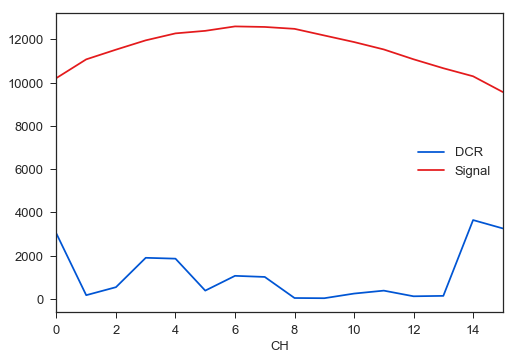

In [14]:
data16ch.plot()

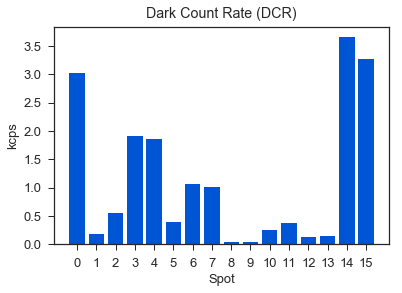

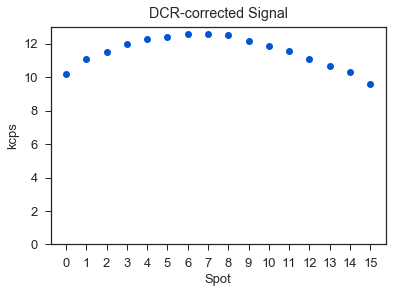

In [15]:
linplot16(data16ch.DCR*1e-3, kind='bar', title='Dark Count Rate (DCR)')
plt.ylabel('kcps')
savefig('DCR.png')
linplot16(data16ch.Signal*1e-3, title='DCR-corrected Signal')
plt.ylabel('kcps')
plt.ylim(0, 13)
savefig('signal.png')

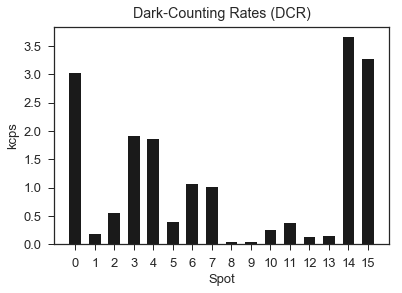

In [16]:
linplot16(data16ch.DCR*1e-3, kind='bar', color='.1', width=0.6, title='Dark-Counting Rates (DCR)')
plt.ylabel('kcps')
savefig('DCR_black.png')

In [17]:
d.A_em[0]

slice(None, None, None)

In [18]:
#%matplotlib notebook

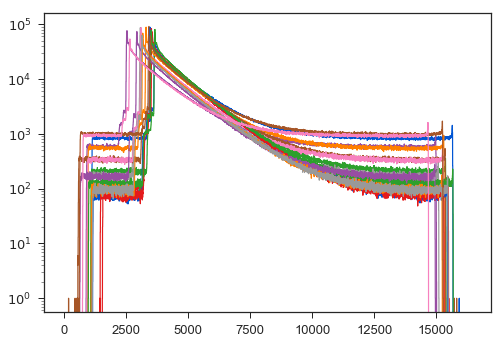

In [19]:
for nt in d.nanotimes:
    plt.hist(nt, bins=np.arange(0, 2**14, 4), histtype='step', lw=1.2);
plt.yscale('log')

# Background

(1, 100000000.0)

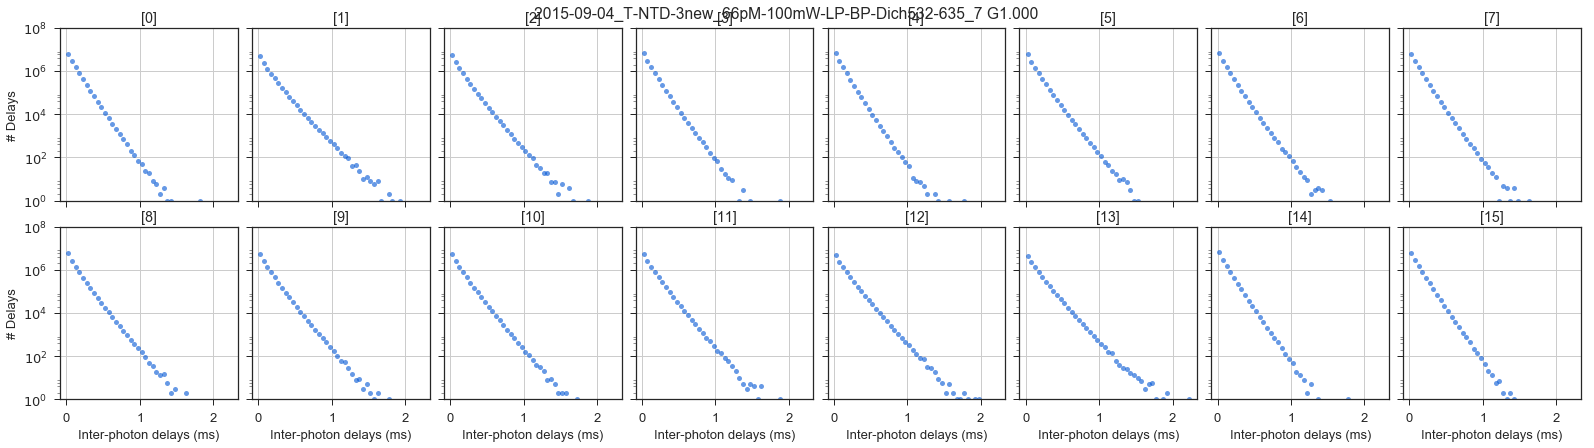

In [20]:
dplot(d, hist_interphoton_single, binwidth=50e-6)
plt.ylim(1, 1e8)

In [21]:
d.calc_bg_cache(fun=bg.exp_fit, time_s=60, tail_min_us=200)

 * Computing BG rates:
 - Calculating BG rates ... [DONE]
 [DONE]


/Users/anto/miniconda3/lib/python3.5/site-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: '{"F_bg": 2, "error_metrics": null, "fit_allph": true, "tail_min_us": 200, "time_s": 60}'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [22]:
%matplotlib inline

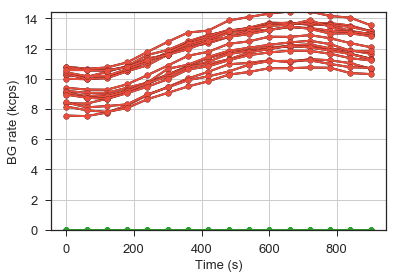

In [23]:
for ich in range(16):
    timetrace_bg(d, i=ich, nolegend=True)

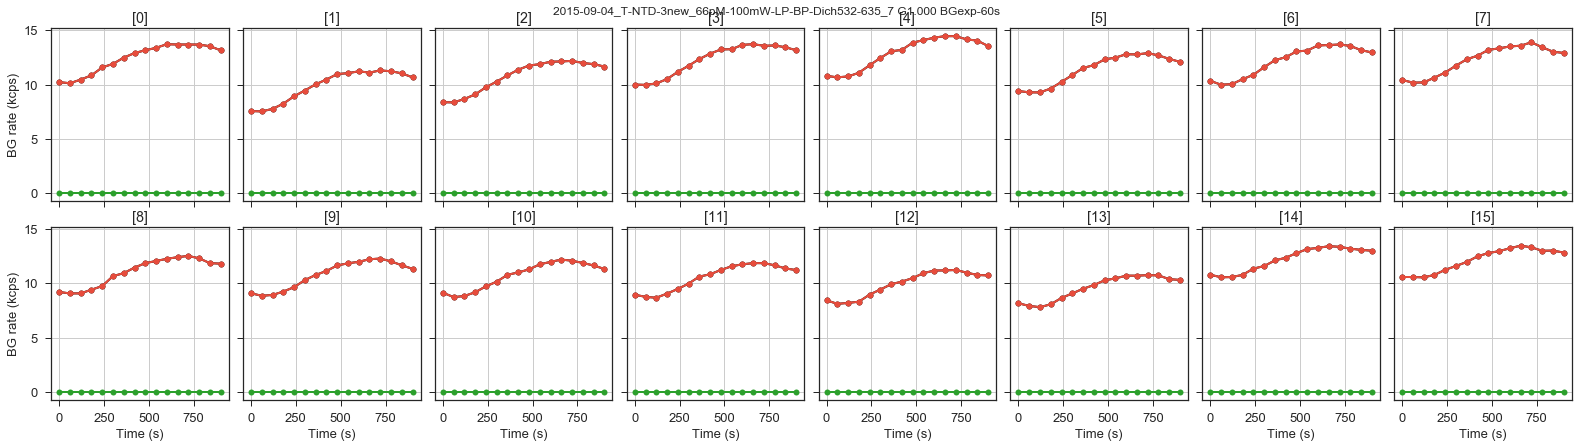

In [24]:
dplot(d, timetrace_bg);

In [25]:
data16ch['RAW Background'] = [b[:3].mean() for b in d.bg[Ph_sel('all')]]

In [26]:
data16ch['Background'] = data16ch['RAW Background'] - data16ch['DCR']

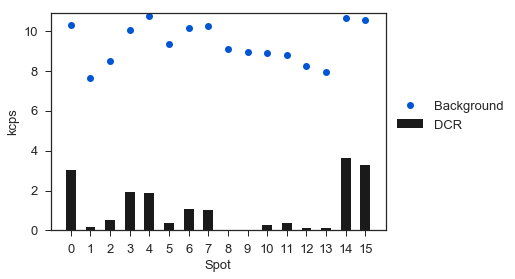

In [27]:
linplot16([b[:3].mean()*1e-3 for b in d.bg[Ph_sel('all')]], label='Background')
linplot16(data16ch.DCR*1e-3, kind='bar', color='.1', width=0.5, ax=plt.gca(), label='DCR')
plt.legend(bbox_to_anchor=(1, 0.65), loc='upper left');
plt.ylabel('kcps')
#savefig('background_vs_dcr.png')

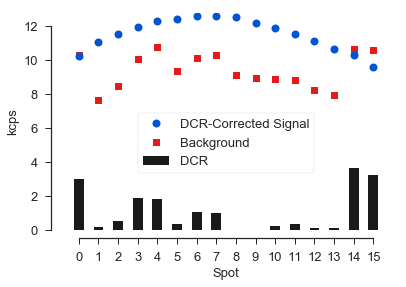

In [28]:
linplot16(data16ch.Signal*1e-3, zorder=10, ms=8, label='DCR-Corrected Signal')
#linplot16(data16ch.Background*1e-3, marker='s', label='DCR-Corrected Background', zorder=1, ax=plt.gca())
linplot16(data16ch['RAW Background']*1e-3, marker='s', label='Background', zorder=1, ax=plt.gca())

linplot16(data16ch.DCR*1e-3, kind='bar', color='.1', width=0.5, label='DCR', ax=plt.gca())
plt.ylabel('kcps')
leg = plt.legend(bbox_to_anchor=(1, 0.5), loc='center left');
savefig('signal_vs_raw_background_vs_dcr.png')
leg = plt.legend(bbox_to_anchor=(0.5, 0.4), loc='center', frameon=True);
leg.get_frame().set(facecolor='w', alpha=1)
sns.despine(trim=True, offset=8)
savefig('signal_vs_raw_background_vs_dcr_legend_inside.png')

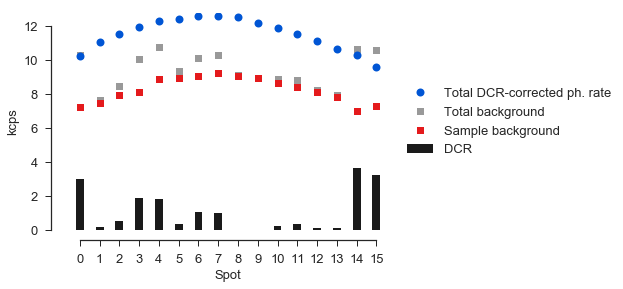

In [48]:
ax = linplot16(data16ch.Signal*1e-3, zorder=10, ms=8, label='Total DCR-corrected ph. rate')
linplot16(data16ch['RAW Background']*1e-3, marker='s', color='0.6', zorder=1, label='Total background', ax=ax)
linplot16(data16ch.Background*1e-3, marker='s', color='C1', label='Sample background', ax=ax)
linplot16(data16ch.DCR*1e-3, kind='bar', color='.1', width=0.4, label='DCR', ax=plt.gca())

plt.ylabel('kcps')
leg = plt.legend(bbox_to_anchor=(1, 0.5), loc='center left');
leg.get_frame().set(facecolor='w', alpha=1)
sns.despine(trim=True, offset=10)
#savefig('signal_vs_background_vs_dcr_legend_inside.png')
savefig('signal_vs_bg_vs_sbg_vs_dcr.png')

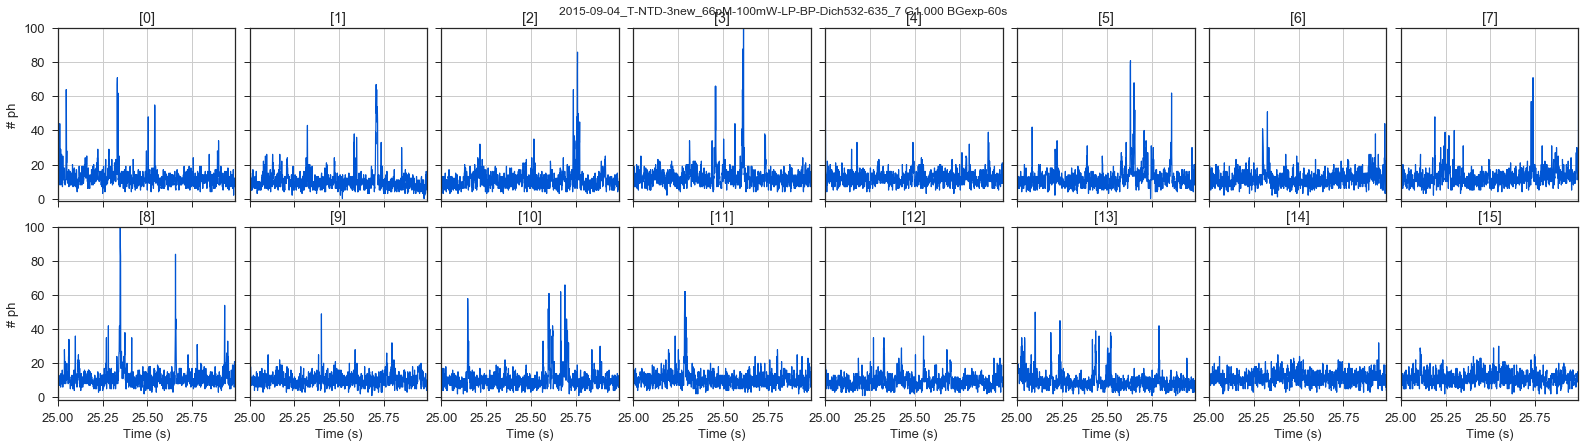

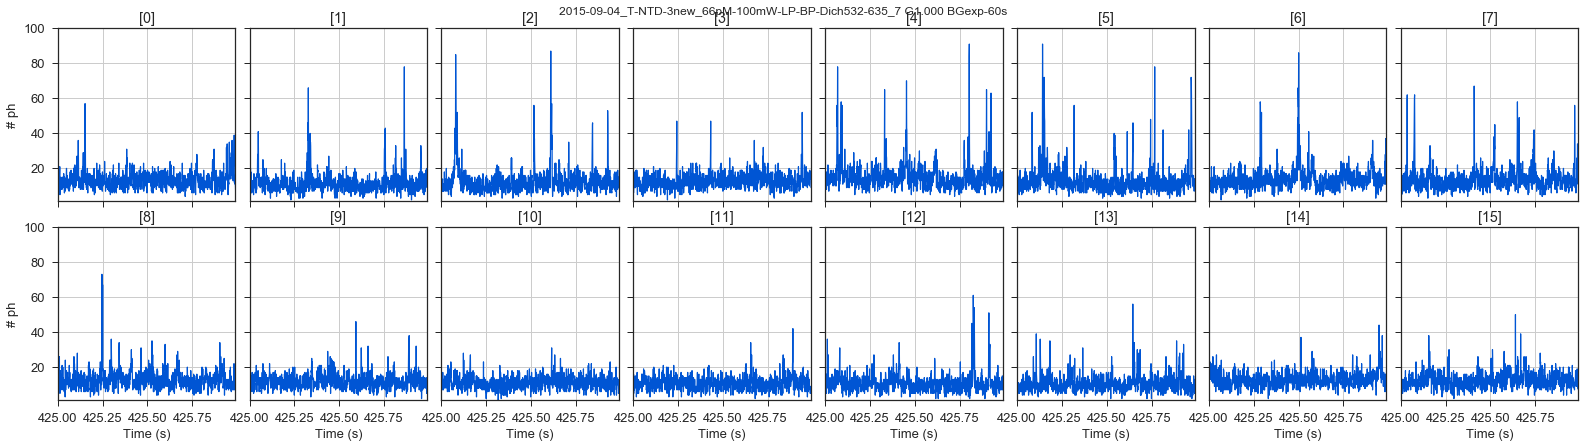

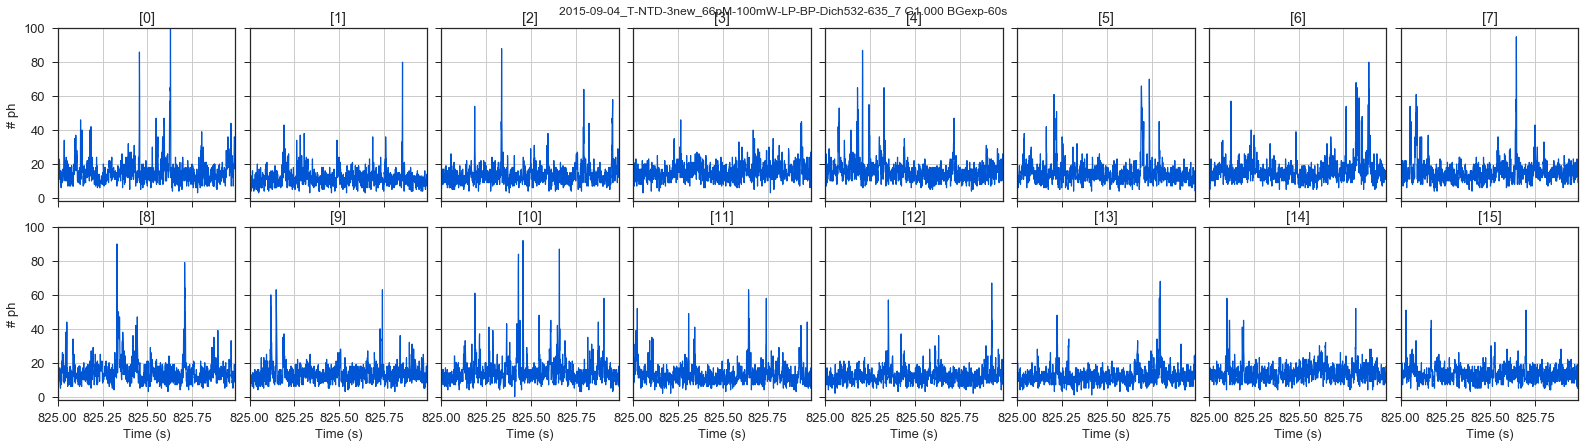

In [35]:
start = int(d.time_min) + 1
for i in (0, 400, 800):
    dplot(d, timetrace_single, tmin=start+i, tmax=start+i+1, show_rate_th=False);
    plt.xlim(start+i, start+i+0.99)

# Burst search: constant rate

In [49]:
d.burst_search(min_rate_cps=70e3)

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   [DONE Counting D/A]


## Burst sizes

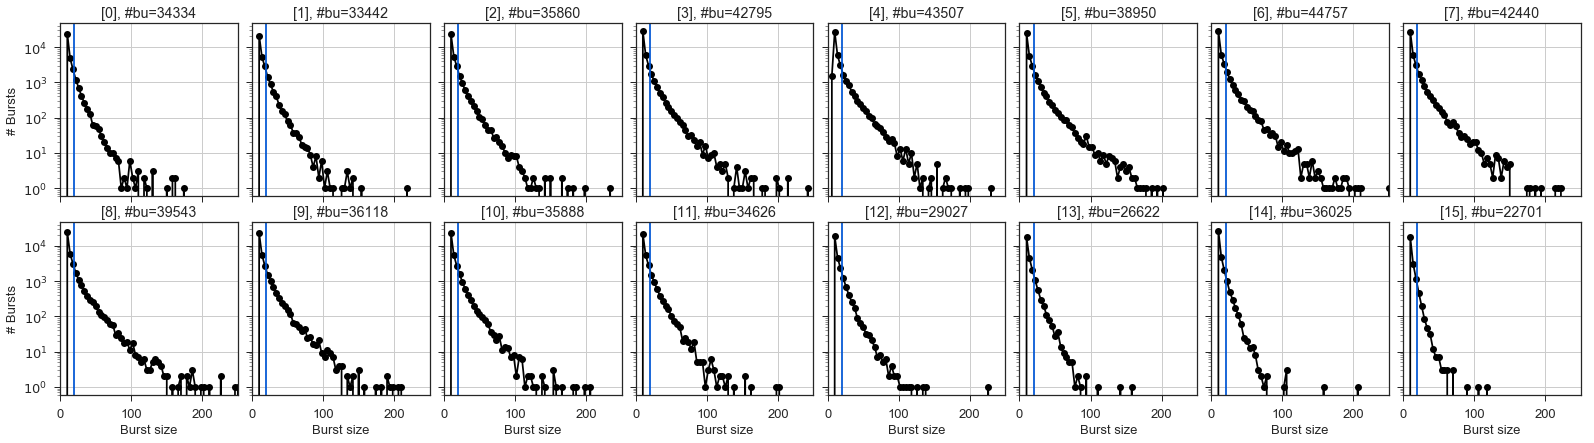

In [37]:
ax = dplot(d, hist_size, suptitle=False);
plt.xlim(0, 250)
savefig('burstsize.png')
for a in ax.ravel():
    a.axvline(20)

In [50]:
th1 = 20
ds = d.select_bursts(select_bursts.size, th1=th1)

mean_bs = np.array([nt.mean() - th1 for nt in ds.nt])

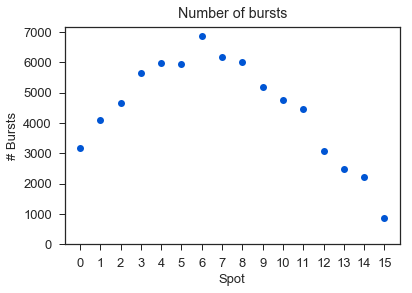

In [39]:
linplot16(ds.num_bursts, title='Number of bursts')
plt.ylabel('# Bursts');
savefig('numbursts_th%d.png' % th1)

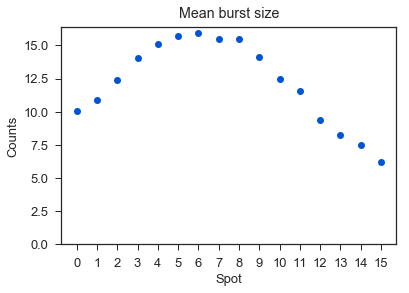

In [40]:
linplot16(mean_bs, title='Mean burst size')
plt.ylabel('Counts');
savefig('meaburstsize_th%d.png' % th1)

## Burst durations

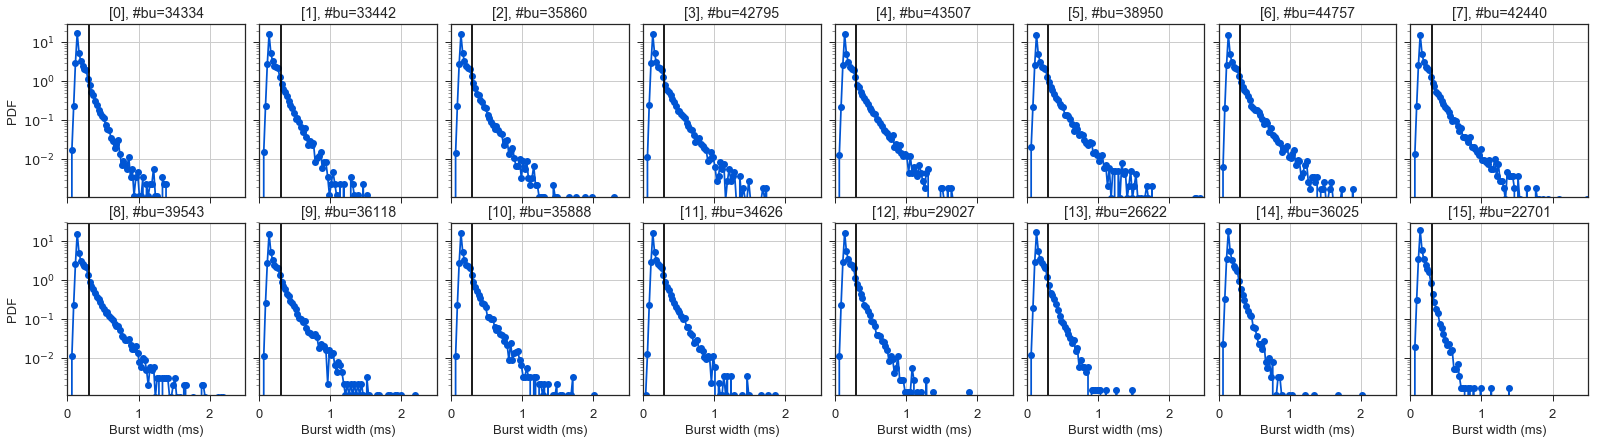

In [41]:
ax = dplot(d, hist_width, suptitle=False);
plt.xlim(0, 2.5)
savefig('burstwidth.png')
for a in ax.ravel():
    a.axvline(0.3, color='k')

In [42]:
d.mburst[0].width

array([2636, 3797, 2767, ..., 2537, 4878, 3340], dtype=int64)

In [51]:
bw_th = 0.3
bw_th_clk = bw_th * 1e-3 / d.clk_p
mean_bw = [bursts.width[bursts.width > bw_th_clk].mean() * d.clk_p * 1e3 - bw_th 
           for bursts in ds.mburst]
mean_bw = np.array(mean_bw)
mean_bw[:3]

array([ 0.12411984,  0.1248452 ,  0.14067488])

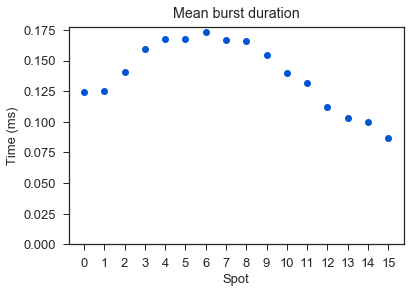

In [43]:
linplot16(mean_bw, title='Mean burst duration')
plt.ylabel('Time (ms)');
savefig('meaburstwidth_th%.1fms.png' % bw_th)

## Burst peak ph. rates

In [52]:
d.calc_max_rate(m=10)

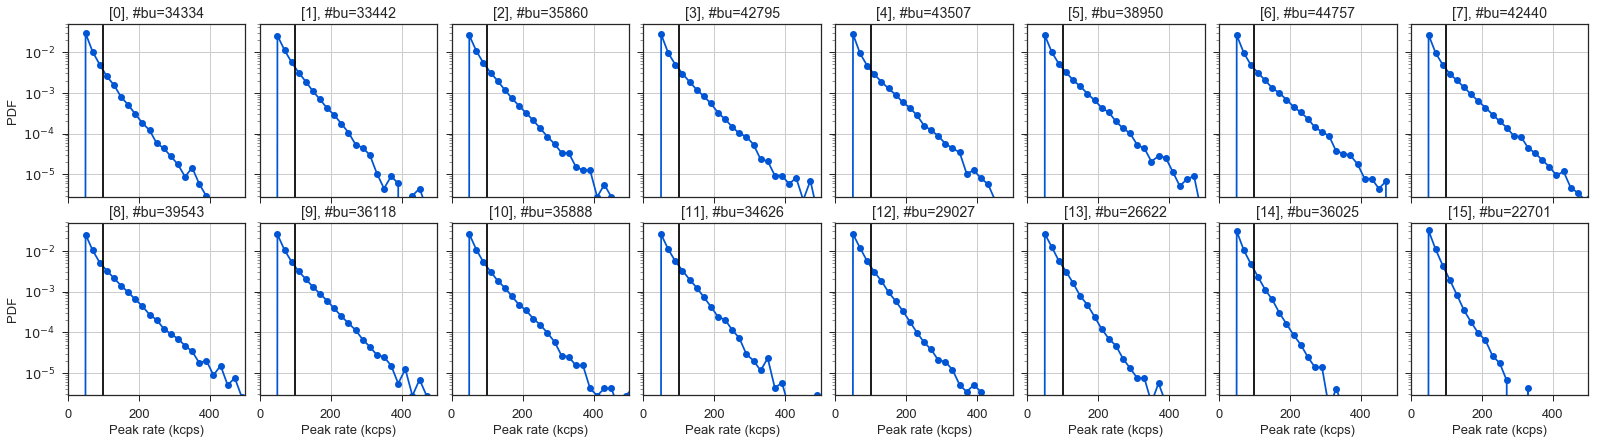

In [46]:
ax = dplot(d, hist_burst_phrate, suptitle=False);
plt.xlim(0, 500)
savefig('peak_ph_rate.png')
for a in ax.ravel():
    a.axvline(100, color='k')

In [53]:
d.max_rate[0]

array([ 50470.97508291,  72717.4786138 ,  47597.30627982, ...,
        49909.13626922,  94804.73538343,  44190.19240896])

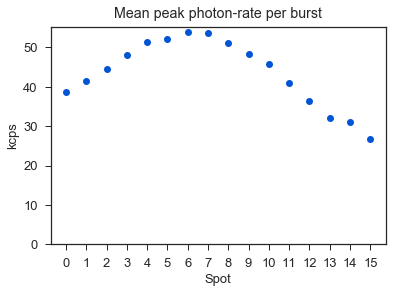

In [54]:
mr_th = 100e3
mmr = np.array([1e-3*(mr[mr > mr_th].mean() - mr_th) for mr in d.max_rate])

linplot16(mmr, title='Mean peak photon-rate per burst')
plt.ylabel('kcps');
savefig('mean_peak_ph_rate.png')

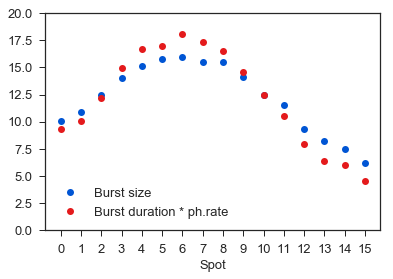

In [55]:
sim_mean_bs = (mean_bw * mmr) * mean_bs.mean() / (mean_bw * mmr).mean()
linplot16(mean_bs, label='Burst size')
linplot16(sim_mean_bs, label='Burst duration * ph.rate', ax=plt.gca())
plt.legend()
plt.ylim(0, 20);

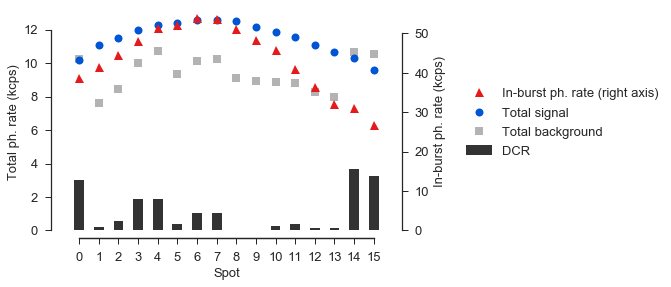

In [50]:
ax = linplot16(data16ch.Signal*1e-3, zorder=10, ms=8, label='Total signal')
linplot16(data16ch['RAW Background']*1e-3, marker='s', color='0.7', label='Total background', zorder=1, ms=8, ax=ax)
linplot16(data16ch.DCR*1e-3, kind='bar', color='.2', width=0.5, label='DCR', ax=ax)
plt.ylabel('Total ph. rate (kcps)')
ax.set_ylim(0, 13)
ax2 = plt.twinx()
linplot16(mmr, label='In-burst ph. rate (right axis)', ax=ax2, color='C1', marker='^', ms=9)
ax2.set_ylabel('In-burst ph. rate (kcps)')


leg2 = ax2.legend(bbox_to_anchor=(1.18, 0.63), loc='center left');
leg = ax.legend(bbox_to_anchor=(1.18, 0.45), loc='center left');
#savefig('signal_vs_raw_background_vs_dcr.png')
#leg = plt.legend(bbox_to_anchor=(0.5, 0.4), loc='center', frameon=True);
#leg.get_frame().set(facecolor='w', alpha=1)
sns.despine(ax=ax, trim=True, offset=8)
sns.despine(ax=ax2, left=True, right=False, trim=True, offset=8)
savefig('signal_vs_raw_background_vs_dcr_vs_peak_ph_rate.png')

# Burst search: PSF FWHM threshold

In [56]:
dw = d.copy()

Deep copy executed.


In [57]:
mmr

array([ 38.76574367,  41.43845021,  44.56577031,  48.1233145 ,
        51.31671307,  52.12808678,  53.86027317,  53.56705572,
        51.17288023,  48.29186753,  45.68350812,  40.89492068,
        36.36803323,  31.98617233,  31.05606942,  26.80476986])

In [58]:
dw.burst_search(min_rate_cps=mmr*1.2e3)

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   [DONE Counting D/A]


In [59]:
dw.calc_max_rate(m=10)

In [60]:
dw.rate_th

array([ 46518.89240583,  49726.14025251,  53478.92437   ,  57747.97739863,
        61580.0556896 ,  62553.70413355,  64632.32779964,  64280.46686174,
        61407.45627615,  57950.24104053,  54820.20974833,  49073.90481119,
        43641.63987609,  38383.40679629,  37267.28330188,  32165.72382624])

## Burst sizes

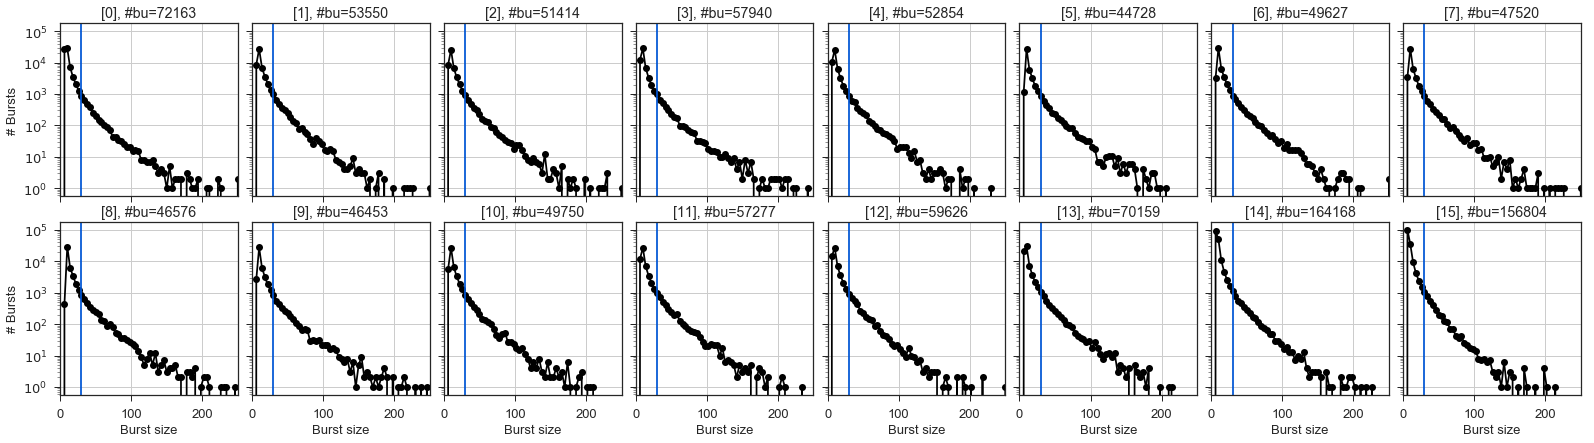

In [56]:
ax = dplot(dw, hist_size, suptitle=False);
plt.xlim(0, 250)
#savefig('burstsize.png')
for a in ax.ravel():
    a.axvline(30)

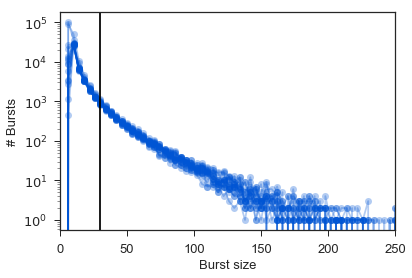

In [57]:
plt_kws = dict(alpha=0.3)
for ich in range(16):
    hist_size(dw, i=ich, color='C0', plot_style=plt_kws, legend=False, pdf=False)
plt.xlim(0, 250)
plt.axvline(30, color='k')

In [61]:
th1 = 30
dsw = dw.select_bursts(select_bursts.size, th1=th1)

mean_bsw = np.array([nt.mean() - th1 for nt in dsw.nt])

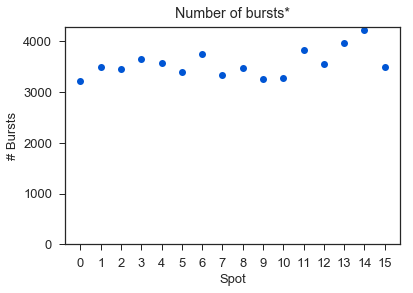

In [62]:
linplot16(dsw.num_bursts, title='Number of bursts*')
plt.ylabel('# Bursts');
savefig('numbursts_bs_peak_ph_rate_th%d.png' % th1)

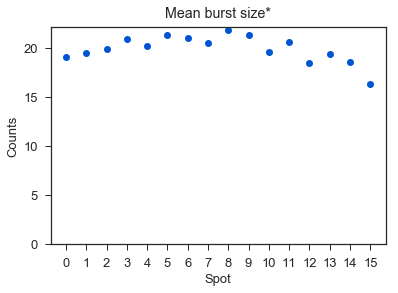

In [63]:
linplot16(mean_bsw, title='Mean burst size*')
plt.ylabel('Counts');
savefig('meaburstsize_bs_peak_ph_rate_th%d.png' % th1)

In [61]:
sns.set_style('ticks')

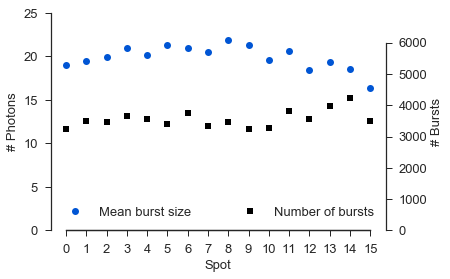

In [62]:
ax = linplot16(mean_bsw, label='Mean burst size')
ax.set(ylabel='# Photons', ylim=(0, 25))
ax2 = plt.twinx(ax)
linplot16(dsw.num_bursts, ax=ax2, marker='s', ms=6, color='k', label='Number of bursts')
ax2.grid(False)
ax2.set_ylabel('# Bursts');
ax2.set_ylim(0, 6950)
ax2.legend(loc='lower right')
ax.legend(loc='lower left')
sns.despine(ax=ax, right=True, left=False, trim=True)
sns.despine(ax=ax2, right=False, left=True, trim=True)
#savefig('meaburstsize_bs_peak_ph_rate_th%d_numbursts.png' % th1)

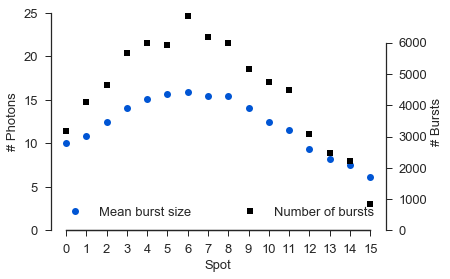

In [63]:
ax = linplot16(mean_bs, label='Mean burst size')
ax.set(ylabel='# Photons', ylim=(0, 25))
ax2 = plt.twinx(ax)
linplot16(ds.num_bursts, ax=ax2, marker='s', ms=6, color='k', label='Number of bursts')
ax2.grid(False)
ax2.set_ylabel('# Bursts');
ax2.set_ylim(0, 6950)
ax2.legend(loc='lower right')
ax.legend(loc='lower left')
sns.despine(ax=ax, right=True, left=False, trim=True)
sns.despine(ax=ax2, right=False, left=True, trim=True)
#savefig('meaburstsize_bs_peak_ph_rate_th%d_numbursts.png' % th1)

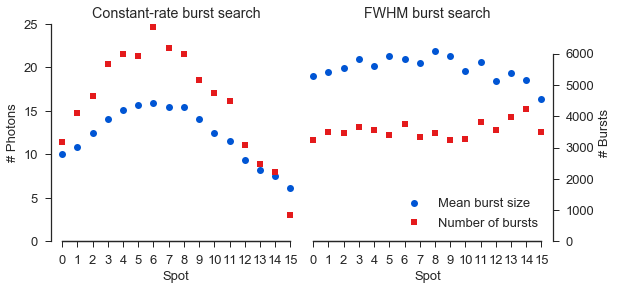

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
linplot16(mean_bs, label='Mean burst size', ax=ax[0], color='C0')
ax[0].set(ylabel='# Photons', ylim=(0, 25))
ax02 = plt.twinx(ax[0])
linplot16(ds.num_bursts, ax=ax02, marker='s', ms=6, color='C1', label='Number of bursts')
ax02.grid(False)
ax02.set(ylabel='# Bursts', ylim=(0, 6950))
#ax02.legend(loc='lower right')
#ax[0].legend(loc='lower left')
sns.despine(ax=ax[0], right=True, left=False, trim=True)
sns.despine(ax=ax02, right=False, left=True, trim=True)

linplot16(mean_bsw, label='Mean burst size', ax=ax[1], color='C0')
ax[1].set(ylabel='# Photons', ylim=(0, 25))
ax12 = plt.twinx(ax[1])
linplot16(dsw.num_bursts, ax=ax12, marker='s', ms=6, color='C1', label='Number of bursts')
ax12.grid(False)
ax12.set(ylabel='# Bursts', ylim=(0, 6950))
ax12.legend(loc='lower left', bbox_to_anchor=(0.35, 0))
ax[1].legend(loc='lower left', bbox_to_anchor=(0.35, 0.09))
sns.despine(ax=ax[1], right=True, left=False, trim=True)
sns.despine(ax=ax12, right=False, left=True, trim=True)

ax02.yaxis.set_visible(False)
ax02.spines['right'].set_visible(False)
ax[1].yaxis.set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.subplots_adjust(wspace=0.0)
ax[0].set_title('Constant-rate burst search')
ax[1].set_title('FWHM burst search')
savefig('meaburstsize_numbursts_bs_comp.png')

In [65]:
# sns.set_style('darkgrid')

## Burst durations

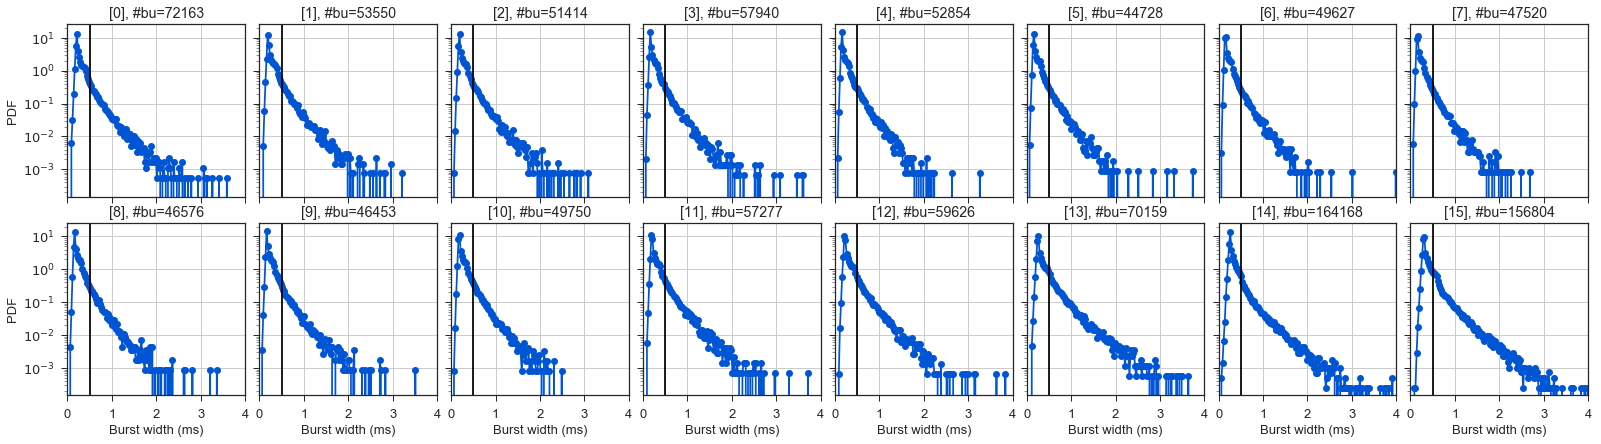

In [66]:
ax = dplot(dw, hist_width, suptitle=False);
plt.xlim(0, 4)
for a in ax.ravel():
    a.axvline(0.5, color='k')

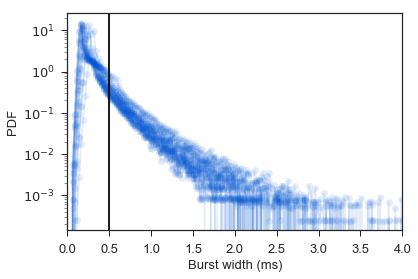

In [67]:
plt_kws = dict(alpha=0.1)
for ich in range(16):
    hist_width(dw, i=ich, color='C0', plot_style=plt_kws)
plt.xlim(0, 4)
plt.axvline(0.5, color='k')

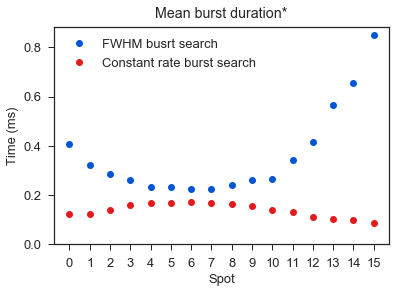

In [68]:
bw_thw = 0.5
bw_th_clk = bw_thw * 1e-3 / d.clk_p
mean_bww = [bursts.width[bursts.width > bw_th_clk].mean() * d.clk_p * 1e3 - bw_thw 
            for bursts in dsw.mburst]
mean_bww = np.array(mean_bww)

linplot16(mean_bww, label='FWHM busrt search', title='Mean burst duration*')
linplot16(mean_bw, label='Constant rate burst search', ax=plt.gca())
plt.ylabel('Time (ms)');
plt.legend()
#savefig('meaburstwidth_bs_peak_ph_rate_th%.1fms.png' % bw_thw)

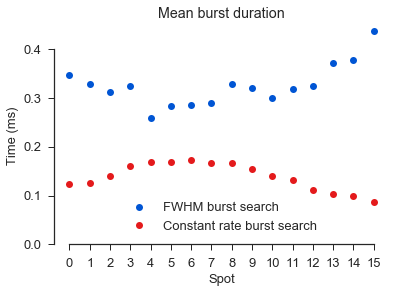

In [69]:
bw_thw = 1
bw_th_clk = bw_thw * 1e-3 / d.clk_p
mean_bww = [bursts.width[bursts.width > bw_th_clk].mean() * d.clk_p * 1e3 - bw_thw 
            for bursts in dsw.mburst]
mean_bww = np.array(mean_bww)

linplot16(mean_bww, label='FWHM burst search', title='Mean burst duration')
linplot16(mean_bw, label='Constant rate burst search', ax=plt.gca())
plt.ylabel('Time (ms)');
plt.legend(loc='lower center')
sns.despine(trim=True)
savefig('meaburstwidth_bs_comp.png')

## Burst peak ph. rates

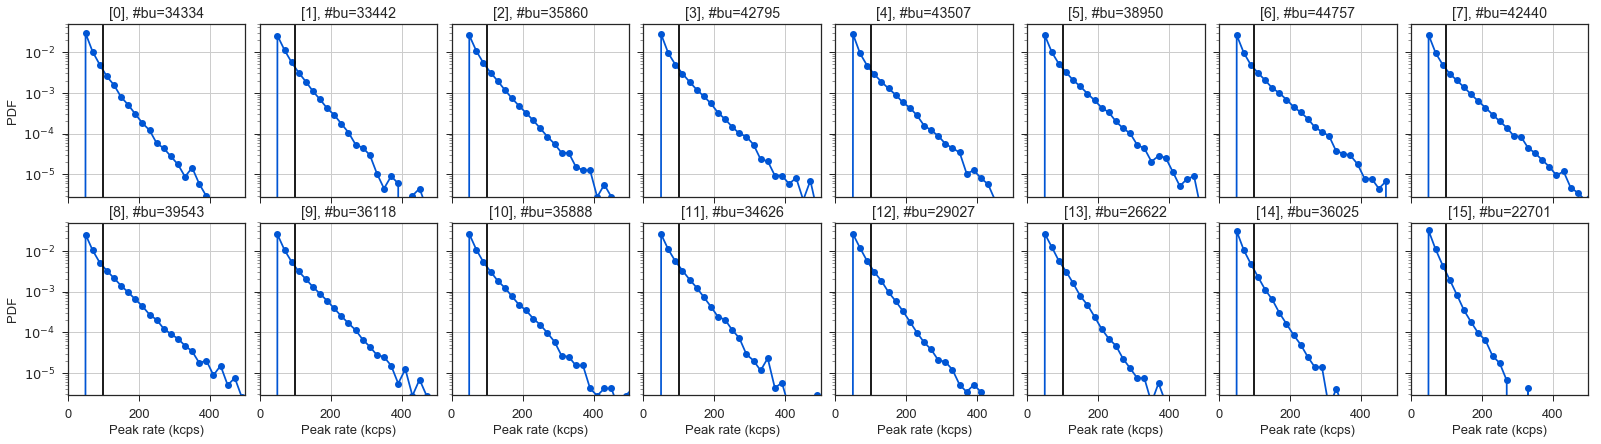

In [70]:
ax = dplot(d, hist_burst_phrate, suptitle=False);
plt.xlim(0, 500)
#savefig('peak_ph_rate.png')
for a in ax.ravel():
    a.axvline(100, color='k')

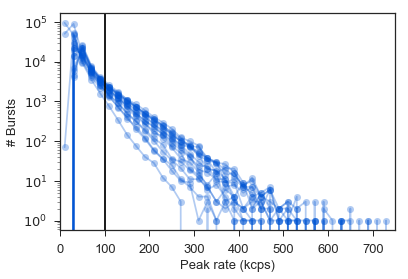

In [71]:
plt_kws = dict(alpha=0.3)
for ich in range(16):
    hist_burst_phrate(dw, i=ich, color='C0', plot_style=plt_kws, pdf=False)
plt.xlim(0, 750)
plt.axvline(100, color='k')

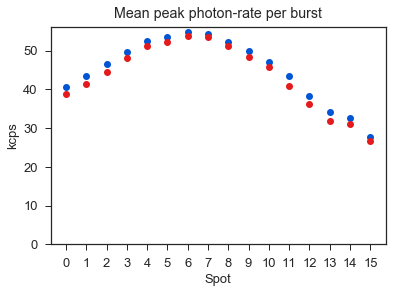

In [70]:
mr_th = 100e3
mmrw = np.array([1e-3*(mr[mr > mr_th].mean() - mr_th) for mr in dw.max_rate])

linplot16(mmrw, title='Mean peak photon-rate per burst')
linplot16(mmr, label='constant rate', ax=plt.gca())
plt.ylabel('kcps');
#savefig('mean_peak_ph_rate.png')

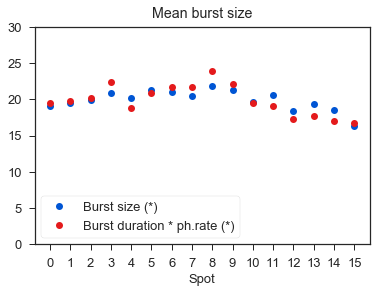

In [71]:
sim_mean_bsw = (mean_bww * mmrw) * mean_bsw.mean() / (mean_bww * mmrw).mean()
linplot16(mean_bsw, label='Burst size (*)', title='Mean burst size')
linplot16(sim_mean_bsw, label='Burst duration * ph.rate (*)', ax=plt.gca())
leg = plt.legend(loc='lower left', frameon=True)
leg.get_frame().set(facecolor='w', alpha=1)
plt.ylim(0, 30);

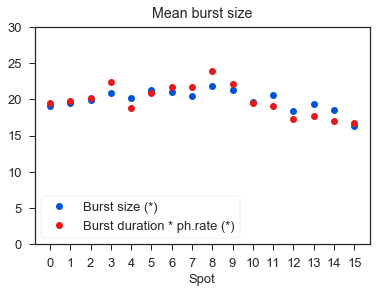

In [74]:
sim_mean_bsw = (mean_bww * mmrw) * mean_bsw.mean() / (mean_bww * mmrw).mean()
linplot16(mean_bsw, label='Burst size (*)', title='Mean burst size')
linplot16(sim_mean_bsw, label='Burst duration * ph.rate (*)', ax=plt.gca())
leg = plt.legend(loc='lower left', frameon=True)
leg.get_frame().set(facecolor='w', alpha=1)
plt.ylim(0, 30);

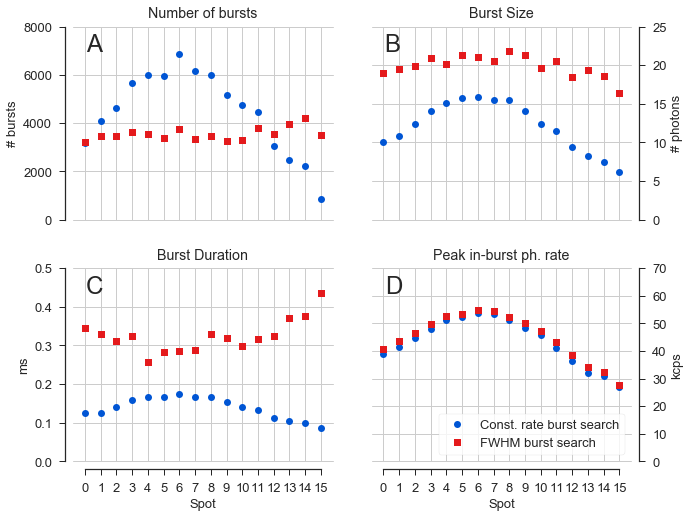

In [138]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=False)

linplot16(ds.num_bursts, title='Number of bursts', label='Const. rate burst search', ax=ax[0,0])
linplot16(dsw.num_bursts, label='FWHM burst search', marker='s', ax=ax[0,0])
ax[0,0].set(ylim=(0, 8000), ylabel='# bursts')

linplot16(mean_bs, title='Burst Size', label='Const. rate burst search', ax=ax[0,1])
linplot16(mean_bsw, label='FWHM burst search', marker='s', ax=ax[0,1])
ax[0,1].set(ylim=(0, 25), ylabel='# photons')

linplot16(mean_bw, title='Burst Duration', label='Const. rate burst search', ax=ax[1,0])
linplot16(mean_bww, label='FWHM burst search', marker='s', ax=ax[1,0])
ax[1,0].set(ylim=(0, 0.5), ylabel='ms')

linplot16(mmr, title='Peak in-burst ph. rate', label='Const. rate burst search', ax=ax[1,1])
linplot16(mmrw, label='FWHM burst search', marker='s', ax=ax[1,1])
ax[1,1].set(ylim=(0, 70), ylabel='kcps')

sns.despine(ax=ax[0, 0], left=False, right=True, bottom=True, trim=True, offset=8)
sns.despine(ax=ax[0, 1], left=True, right=False, bottom=True, trim=True, offset=8)
sns.despine(ax=ax[1, 0], left=False, right=True, bottom=False, trim=True, offset=8)
sns.despine(ax=ax[1, 1], left=True, right=False, bottom=False, trim=True, offset=8)

for p, a in zip('ABCD', ax.ravel()):
    a.grid(True)
    a.text(0.05, 0.87, p, fontsize=24, transform=a.transAxes)

for a in ax[0]:
    a.set(xlabel='')
    a.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
for a in ax[:, 1]:
    a.yaxis.set_label_position("right")
    a.yaxis.set_ticks_position('right')
ax[1,1].legend(loc='lower right', frameon=True)
plt.subplots_adjust(hspace=0.25, wspace=0.15)
savefig('burst_stats.png')

## Other 16-ch figures

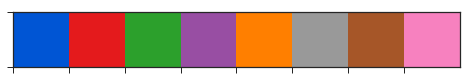

In [75]:
sns.palplot(sns.color_palette())

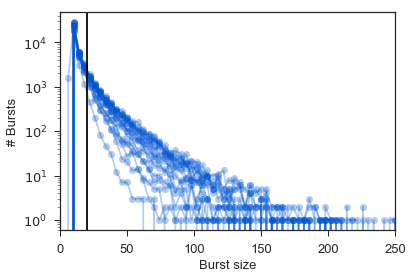

In [76]:
plt_kws = dict(alpha=0.3)
for ich in range(16):
    hist_size(d, i=ich, color='C0', plot_style=plt_kws, legend=False, pdf=False)
plt.xlim(0, 250)
plt.axvline(20, color='k')

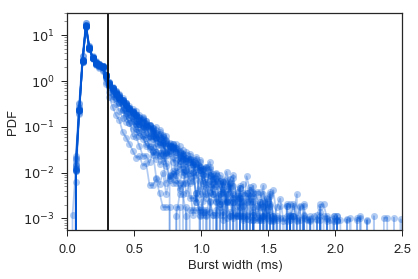

In [77]:
plt_kws = dict(alpha=0.3)
for ich in range(16):
    hist_width(d, i=ich, color='C0', plot_style=plt_kws)
plt.xlim(0, 2.5)
plt.axvline(0.3, color='k')

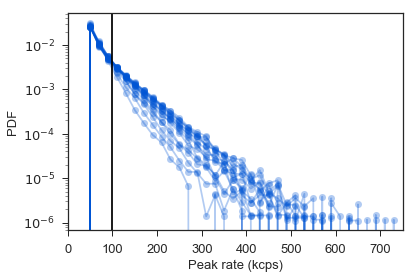

In [78]:
plt_kws = dict(alpha=0.3)
for ich in range(16):
    hist_burst_phrate(d, i=ich, color='C0', plot_style=plt_kws)
plt.xlim(0, 750)
plt.axvline(100, color='k')

# TCSPC Nanotimes

The nanotimes for the measurement is saved in the `.nanotimes` 
attribute of the `Data()` object (here either `d` or `ds`).

As an example here we get the array of nanotimes for all photons, 
donor emission and acceptor emission:

In [112]:
d.nanotimes

[array([4546, 6437, 3650, ..., 5169, 6334, 6057], dtype=uint16),
 array([5743, 4254, 5239, ..., 4804, 6128, 5582], dtype=uint16),
 array([ 9500,  5145,  5607, ...,  6443, 12126, 14320], dtype=uint16),
 array([ 2409,  2750, 11557, ...,  3257,  3300,  3107], dtype=uint16),
 array([ 4122,  3823, 14904, ...,  3362,  5510,  5984], dtype=uint16),
 array([6546, 6713, 6269, ..., 3405, 4279, 3956], dtype=uint16),
 array([4497, 3418, 6195, ..., 2192, 3412, 3926], dtype=uint16),
 array([2254, 3893, 5605, ..., 3118, 3208, 3411], dtype=uint16),
 array([3869, 3953, 4171, ..., 4109, 4127, 3590], dtype=uint16),
 array([5520, 4852, 5042, ..., 5256, 3616, 4306], dtype=uint16),
 array([5410, 4739, 3557, ..., 3495, 5262, 3557], dtype=uint16),
 array([4853, 3302, 4256, ..., 3835, 1337, 2934], dtype=uint16),
 array([4966, 5080, 3452, ..., 4349, 4351, 3135], dtype=uint16),
 array([3824, 5251, 7573, ..., 4128, 3152, 3138], dtype=uint16),
 array([4188, 4165, 9583, ..., 3830, 8926, 3834], dtype=uint16),
 array(

In [113]:
ph_in_bursts_mask = ds.ph_in_bursts_mask_ich()

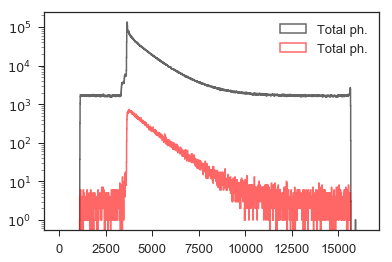

In [114]:
hist_params = dict(bins=range(0, 2**14, 8), histtype='step', alpha=0.6, lw=1.5)
hist(d.nanotimes[0], color='k', label='Total ph.', **hist_params)
hist(d.nanotimes[0][ph_in_bursts_mask], color='r', label='Total ph.', **hist_params)
plt.legend()
plt.yscale('log')

In [115]:
tcspc_unit = [p['tcspc_unit'] for p in ds.nanotimes_params]
len(tcspc_unit), tcspc_unit[:3]

(16, [3.332e-12, 3.345e-12, 3.414e-12])

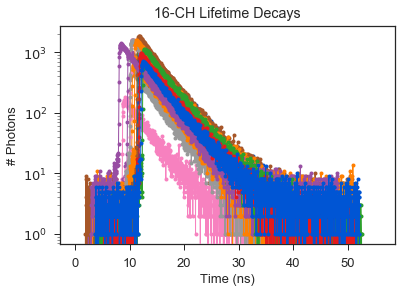

In [116]:
bins_r=np.arange(0, 2**14, 8)
kws = dict(marker='o', ms=4, lw=1, alpha=1)
for i in range(16):
    unit = tcspc_unit[i] * 1e9
    ph_in_bursts_mask = ds.ph_in_bursts_mask_ich(i)
    ntimes = d.nanotimes[i][ph_in_bursts_mask] * unit
    counts, bins = np.histogram(ntimes, bins=bins_r*unit)
    plt.plot(bins[1:], counts, zorder=20-i, **kws)
    
plt.yscale('log')
plt.xlabel('Time (ns)')
plt.ylabel('# Photons')
plt.title('16-CH Lifetime Decays', va='bottom');

(0, 250)

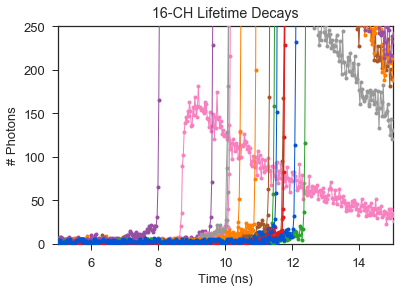

In [117]:
bins_r=np.arange(0, 2**14, 8)
kws = dict(marker='o', ms=4, lw=1, alpha=1)
for i in range(16):
    unit = tcspc_unit[i] * 1e9
    ph_in_bursts_mask = ds.ph_in_bursts_mask_ich(i)
    ntimes = d.nanotimes[i][ph_in_bursts_mask] * unit
    counts, bins = np.histogram(ntimes, bins=bins_r*unit)
    plt.plot(bins[1:], counts, zorder=20-i, **kws)
    
plt.xlabel('Time (ns)')
plt.ylabel('# Photons')
plt.title('16-CH Lifetime Decays', va='bottom');
plt.xlim(5, 15);
plt.ylim(0, 250)

In [118]:
tcspc_unit = [p['tcspc_unit'] for p in ds.nanotimes_params]
len(tcspc_unit), tcspc_unit[:3]

(16, [3.332e-12, 3.345e-12, 3.414e-12])

In [119]:
vmin_th = 20
cross_th = 0.5
bins_r=np.arange(0, 2**14, 8)

offset_ns = np.zeros(16)
for i in range(16):
    unit = tcspc_unit[i] * 1e9
    ph_in_bursts_mask = ds.ph_in_bursts_mask_ich(i)
    ntimes = ds.nanotimes[i][ph_in_bursts_mask] * unit
    counts, bins = np.histogram(ntimes, bins=bins_r*unit)
    t = bins[:-1] + 0.5*(bins[1] - bins[0])
    
    counts_rise1 = counts[:counts.argmax()]
    vmin = counts.max() / vmin_th
    risestart = np.where(counts_rise1 < vmin)[0][-1]
    risestop = counts.argmax()
    ti, yi = t[risestart:risestop], counts[risestart:risestop]
    t_cross = np.interp(cross_th * counts.max(), yi, ti)
    offset_ns[i] = t_cross
offset_ns -= offset_ns.min()
offset_ns

array([ 4.04690114,  3.73384923,  4.35479582,  0.        ,  2.87931191,
        2.07450869,  3.30124144,  2.12289138,  3.51638841,  3.74246026,
        3.42701531,  1.58407616,  2.40467182,  2.01638826,  3.68093971,
        0.64318034])

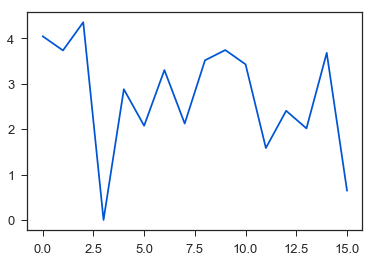

In [120]:
plt.plot(offset_ns)

In [131]:
(max(tcspc_unit) - min(tcspc_unit)) / np.max(tcspc_unit)

0.059753954305799745

In [128]:
3.3*8

26.4

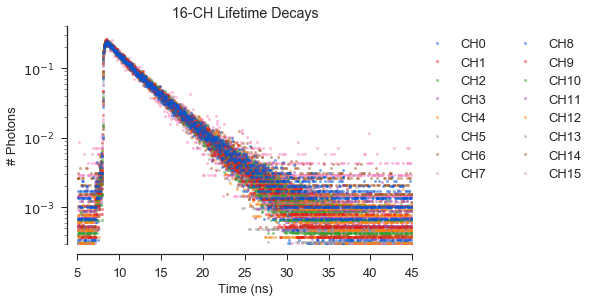

In [121]:
bins_r=np.arange(0, 2**14, 8)
#hist_params = dict(histtype='step', alpha=0.6, lw=1.5)
kws = dict(marker='o', ms=3, lw=0, alpha=0.5)
for i in range(16):
    unit = tcspc_unit[i] * 1e9
    ph_in_bursts_mask = ds.ph_in_bursts_mask_ich(i)
    ntimes = d.nanotimes[i][ph_in_bursts_mask] * unit
    counts, bins = np.histogram(ntimes - offset_ns[i], bins=bins_r*unit, density=True)
    plt.plot(bins[1:], counts, zorder=20-i, label='CH%d' % i, **kws)

plt.xlim(5, 45)
plt.ylim(3e-4, 0.4)
plt.yscale('log')
plt.xlabel('Time (ns)')
plt.ylabel('Probability')
plt.title('16-CH Lifetime Decays', va='bottom');
sns.despine(trim=False, offset=10)
savefig('sm_inbursts_lifetime_decays.png')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=2);
savefig('sm_inbursts_lifetime_decays_legend.png')

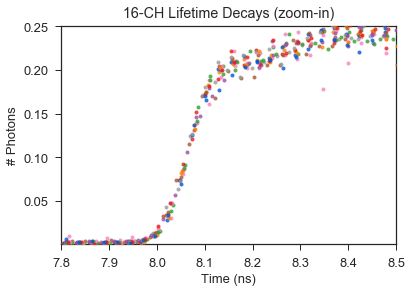

In [89]:
bins_r=np.arange(0, 2**14, 8)
kws = dict(marker='o', ms=4, lw=0, alpha=0.8)
for i in range(16):
    unit = tcspc_unit[i] * 1e9
    ph_in_bursts_mask = ds.ph_in_bursts_mask_ich(i)
    ntimes = d.nanotimes[i][ph_in_bursts_mask] * unit
    counts, bins = np.histogram(ntimes - offset_ns[i], bins=bins_r*unit, density=True)
    plt.plot(bins[1:], counts, zorder=20-i, label='CH%d' % i, **kws)

plt.xlim(7.8, 8.5)
plt.ylim(1e-3, 2.5e-1)
plt.xlabel('Time (ns)')
plt.ylabel('# Photons')
plt.title('16-CH Lifetime Decays (zoom-in)', va='bottom');

In [90]:
def calc_mean_lifetime(dx, t1=0, t2=np.inf, ph_sel=Ph_sel('all'), offsets=None):
    """Compute the mean lifetime in each burst.

    Arguments:
        t1, t2 (floats): min and max value (in seconds) for the
            nanotime to be included in the mean
        ph_sel (Ph_sel object): object defining the photon selection.
            See :mod:`fretbursts.ph_sel` for details.

    Returns:
        List of arrays of per-burst mean lifetime in seconds. One array per channel.
    """
    if offsets is None:
        offsets = np.zeros(d.nch)
    mean_lifetimes = []
    units = [p['tcspc_unit'] for p in ds.nanotimes_params]
    for unit, bursts, nanot, mask in zip(units, dx.mburst, dx.nanotimes, dx.iter_ph_masks(ph_sel)):
        
        nanot_s = (nanot * unit) - offsets[i]
        selection = (nanot_s > t1) * (nanot_s < t2)
        # Select photons in ph_sel AND with nanotime in [t1, t2]
        if bl.isarray(mask):
            selection *= mask
        mean_lifetimes.append(
            bl.burst_ph_stats(nanot_s, bursts, mask=selection, func=np.mean) - t1
        )
    return mean_lifetimes

In [91]:
mlt = calc_mean_lifetime(ds, t1=13e-9, t2=45e-9, offsets=offset_ns*1e-9)

C:\Users\laser2002j\Miniconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\laser2002j\Miniconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


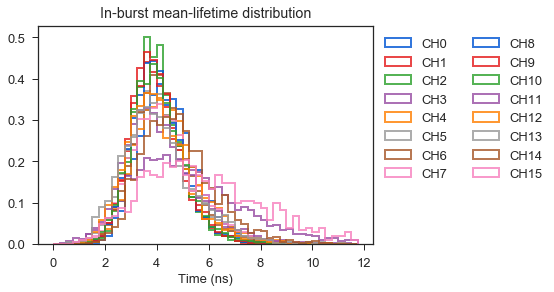

In [92]:
channels = range(16)
hist_params = dict(bins=np.arange(0, 12, 0.25), histtype='step', alpha=0.8, lw=2, normed=True)
for i in channels:
    meanlife = mlt[i][~np.isnan(mlt[i])]*1e9
    plt.hist(meanlife, label='CH%d'%i, **hist_params);

#plt.xlim(0, 12)
plt.xlabel('Time (ns)')
plt.title('In-burst mean-lifetime distribution', va='bottom');
savefig('Mean in-burst lifetime distribution.png')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=2);
savefig('Mean in-burst lifetime distribution_legend.png')

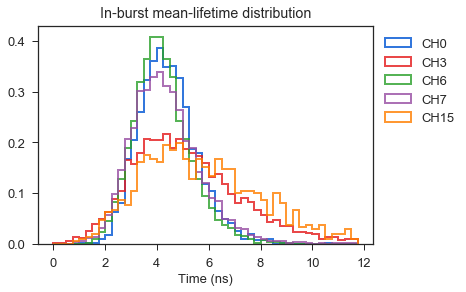

In [93]:
channels = (0, 3, 6, 7, 15)
hist_params = dict(bins=np.arange(0, 12, 0.25), histtype='step', alpha=0.8, lw=2, normed=True)
for i in channels:
    meanlife = mlt[i][~np.isnan(mlt[i])]*1e9
    plt.hist(meanlife, label='CH%d'%i, **hist_params);
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
plt.xlabel('Time (ns)')
plt.title('In-burst mean-lifetime distribution', va='bottom');
savefig('Mean in-burst lifetime distribution_sel_ch.png')

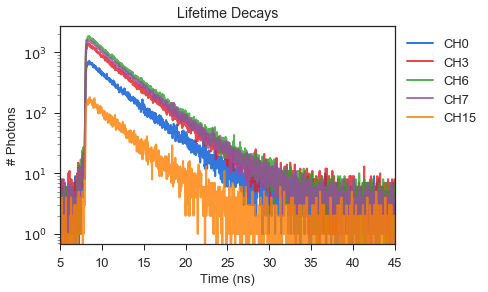

In [94]:
channels = (0, 3, 6, 7, 15)
bins_r=np.arange(0, 2**14, 8)

kws = dict(marker='o', ms=0, lw=2, alpha=0.8)
for i in channels:
    unit = tcspc_unit[i] * 1e9
    ph_in_bursts_mask = ds.ph_in_bursts_mask_ich(i)
    ntimes = d.nanotimes[i][ph_in_bursts_mask] * unit
    counts, bins = np.histogram(ntimes, bins=bins_r*unit)
    t = bins[:-1] + 0.5*(bins[1] - bins[0])
    plt.plot(t - offset_ns[i], counts, label='CH%d' % i, **kws)
    
plt.legend()
plt.yscale('log')
plt.xlabel('Time (ns)')
plt.ylabel('# Photons')
plt.title('Lifetime Decays', va='bottom');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
plt.xlim(5, 45);
savefig('sm_inbursts_lifetime_decays_nonorm_sel_ch.png')

# Timetrace figure

In [95]:
sns.set_style('ticks')

In [96]:
start = int(d.time_min) + 1

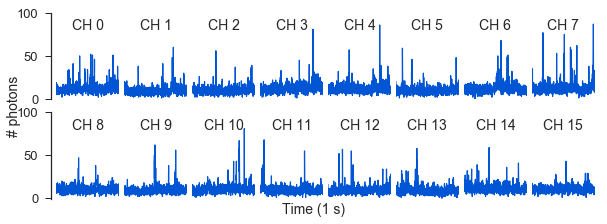

In [97]:
i = 2
ax = bpl.dplot_16ch(d, timetrace_single, tmin=start+i, tmax=start+i+1, show_rate_th=False, suptitle=False, figsize=(8.5, 3));
plt.xlim(start+i, start+i+1)
#plt.ylim(0, 99)
for a in ax[:, 1:].ravel():
    a.yaxis.set_visible(False)
for i, a in enumerate(ax.ravel()):
    a.set(title='', xlabel='', ylabel='')
    a.xaxis.set_visible(False)
    sns.despine(ax=a, left=True, bottom=True, offset=5)
    a.grid(False)
    a.text(0.5, 0.85, 'CH %d' % i, va='center', ha='center', transform=a.transAxes, fontsize=14)
for a in ax[:, 0]:
    sns.despine(ax=a, left=False, bottom=True, offset=5)
fig = a.figure
fig.text(0.5, 0.00, 'Time (1 s)', ha='center', fontsize=14)
fig.text(0.0, 0.5, '# photons', va='center', rotation='vertical', fontsize=14)
savefig('timetrace_16_small.png')